Decision Trees

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This code sets up the environment for plotting in Python. It ensures compatibility between Python 2 and 3,
imports necessary libraries like numpy for numerical operations and os for directory management,
and configures Matplotlib to display plots inline with customized font sizes for better visualization.
It also creates a directory structure to save figures and defines a save_fig() function that saves plots to a specified directory with options for layout adjustment,
file format, and resolution. The goal is to ensure reproducibility and organize the output for easy access.


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and visualizing

This code loads the Iris dataset using load_iris() and selects only the petal length and width (the last two features) for the features (X) and assigns the target labels (y).
It then creates a Decision Tree classifier with a maximum depth of 2 and a fixed random seed (random_state=42) to ensure reproducibility.
The classifier is trained (fit) on the selected data (X) and target labels (y) to build a decision tree model.



In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

This code loads the Iris dataset and selects petal length and width (the last two features) as
the features (X) and assigns the target labels (y).
It then creates and trains a Decision Tree classifier with a maximum depth of 2 and a fixed
random seed for reproducibility. After fitting the model,
the decision tree is visualized using plot_tree(), displaying the tree structure with
labeled features, class names, and node colors representing class purity.
The tree is displayed in a plot with a specified size of 10x6 inches.
The plot helps to understand how the decision tree splits the data based on the chosen features.

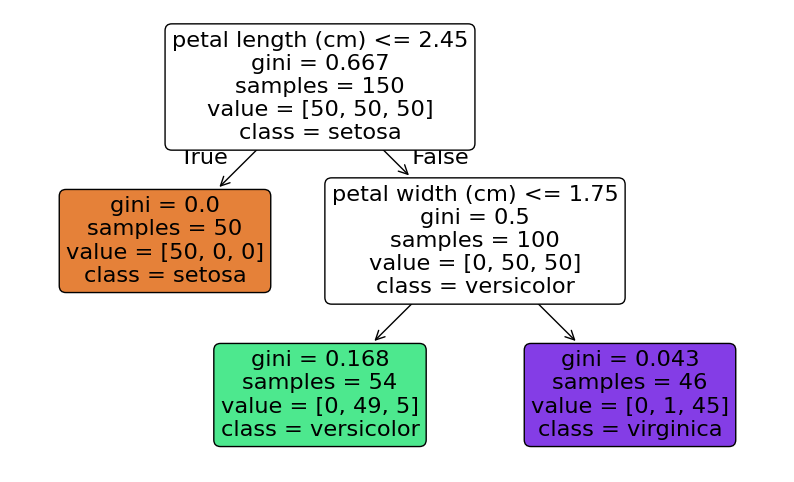

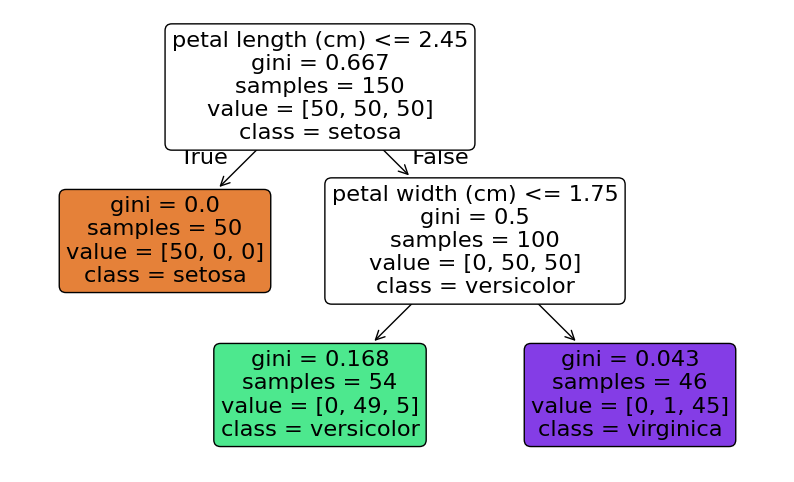

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Create and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True, rounded=True)
plt.show()
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Create and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True, rounded=True)
plt.show()


This code exports the trained decision tree (tree_clf) as a .dot file,
which is a text format representing the tree structure.
The export_graphviz function saves the tree to the specified path with feature names and class labels.
The tree nodes are styled with rounded corners and filled colors to show class purity.
This .dot file can be used with Graphviz to visualize the decision tree graphically.



In [4]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return os.path.join(IMAGES_PATH, fig_id)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

This code visualizes the decision boundaries of a decision tree classifier (tree_clf) trained on the Iris dataset.
It defines a function plot_decision_boundary that creates a grid of points in the
feature space (petal length and width) and predicts the class for each point using the classifier.
The decision boundaries are then plotted as contours on a 2D plane. The points from the training set are
overlaid on the plot with different colors for each Iris species.
Additionally, vertical and horizontal lines are drawn to represent the decision tree's splits at
different depths. The figure is saved using save_fig and displayed.


Saving figure decision_tree_decision_boundaries_plot


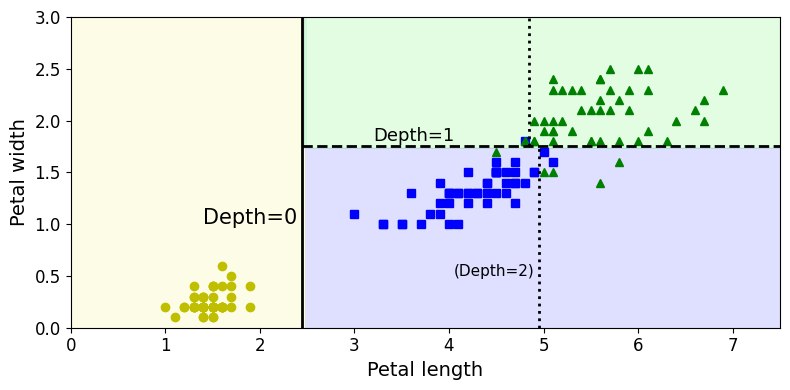

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

This code trains a decision tree classifier on the Iris dataset using the petal length and petal width as features.
The tree is constrained to a maximum depth of 2 for simplicity.
After fitting the model, the plot_tree function is used to visualize the structure of the decision tree, where the nodes show splits based on feature values,
the classes are color-coded, and the tree is presented with rounded corners and filled nodes. The plot is displayed with plt.show().
This visualization helps to understand how the decision tree makes predictions based on the input features.

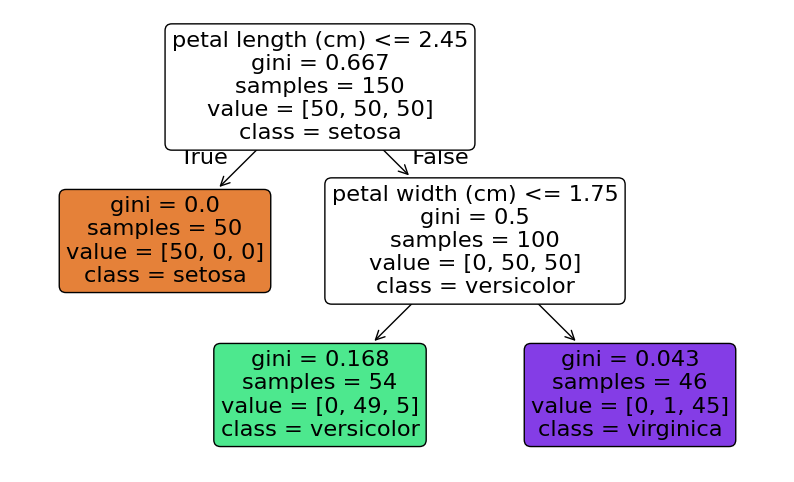

In [6]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Create and train the decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True, rounded=True)
plt.show()


# Predicting classes and class probabilities

In [7]:
#predicted probabilit
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

The predicted class is the one with the highest probability, which is Iris-Versicolor (class 1).


In [8]:
##predicted class labels
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details

In [9]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

The code removes the Iris-Versicolor flower with a petal width of 1.8 from the dataset and then trains a new decision tree classifier on the remaining data.
This helps create a model that doesn't include that specific flower.


In [10]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

This code plots the decision boundary of a decision tree (tree_clf_tweaked) after removing the widest Iris-Versicolor flower from the dataset.
The plot shows how the decision boundary changes with different tree depths and saves the figure as "decision_tree_instability_plot".



Saving figure decision_tree_instability_plot


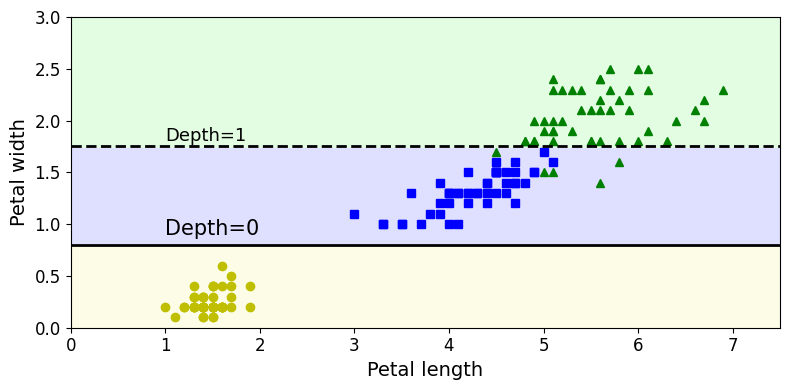

In [11]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

This code creates two decision trees with different configurations to visualize how
restricting the minimum number of samples required in a leaf node (min_samples_leaf) affects the decision boundary.
The first tree (deep_tree_clf1) has no restrictions, while the second (deep_tree_clf2) requires at least 4 samples per leaf.
The decision boundaries of both trees are plotted side by side for comparison, and the figure is saved as "min_samples_leaf_plot".


Saving figure min_samples_leaf_plot


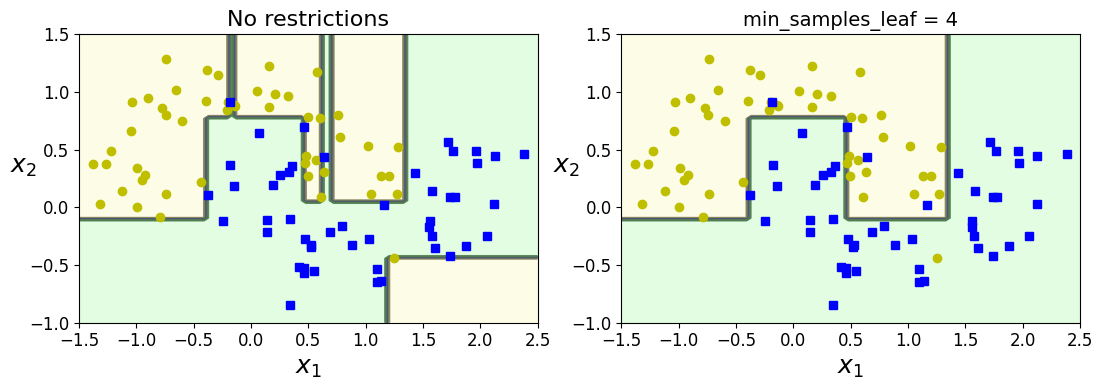

In [12]:

from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

This code applies a rotation transformation to the feature matrix X of the dataset by multiplying it with a 2D rotation matrix.
The rotation is by 20 degrees, which is specified by the angle np.pi / 180 * 20. The transformed dataset Xr is then used to train a decision tree classifier (tree_clf_r).
The decision boundary of this classifier is plotted to show how the rotation affects the decision regions, with the plot displayed in a figure of size 8x3.



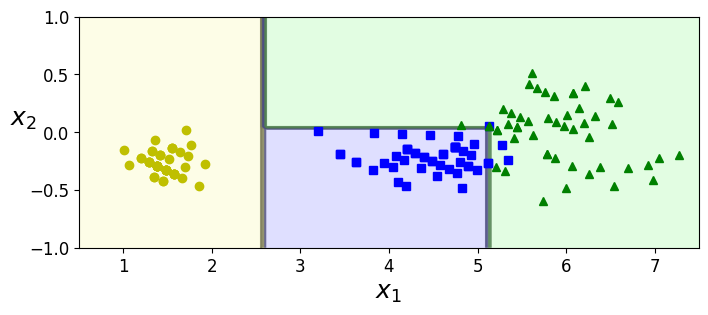

In [13]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

This code creates a random dataset and labels it based on the first feature. It then rotates the dataset by 45 degrees and trains two decision trees:
one on the original data and the other on the rotated data.
The decision boundaries of both models are plotted side by side to show how rotation affects the decision tree.



Saving figure sensitivity_to_rotation_plot


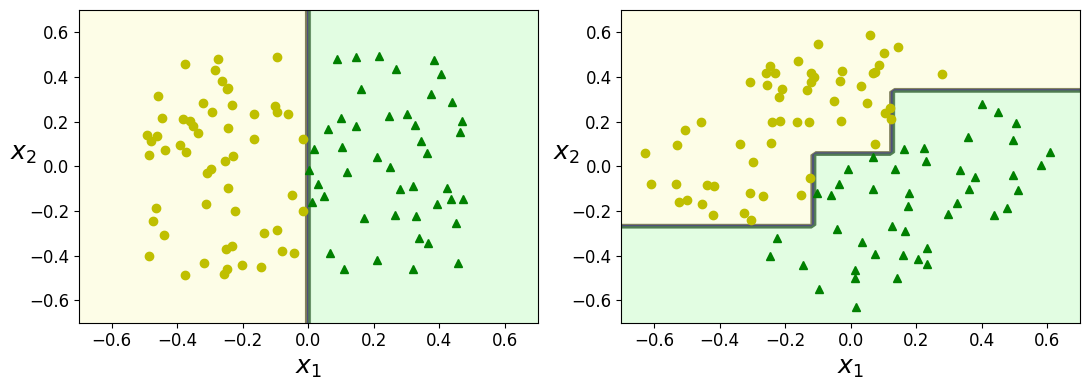

In [14]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

save_fig("sensitivity_to_rotation_plot")
plt.show()

# Regression trees

This code generates a quadratic training set with some added noise. It first creates a set of 200 random values for X, ranging from 0 to 1. Then, it calculates y based on a quadratic function of X (specifically,
(y = formula)  and adds a small amount of noise to the y values by including random noise scaled by 0.1. This creates a dataset with a quadratic relationship between X and y, but with some randomness or variability.

In [15]:

# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [16]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Saving figure tree_regression_plot


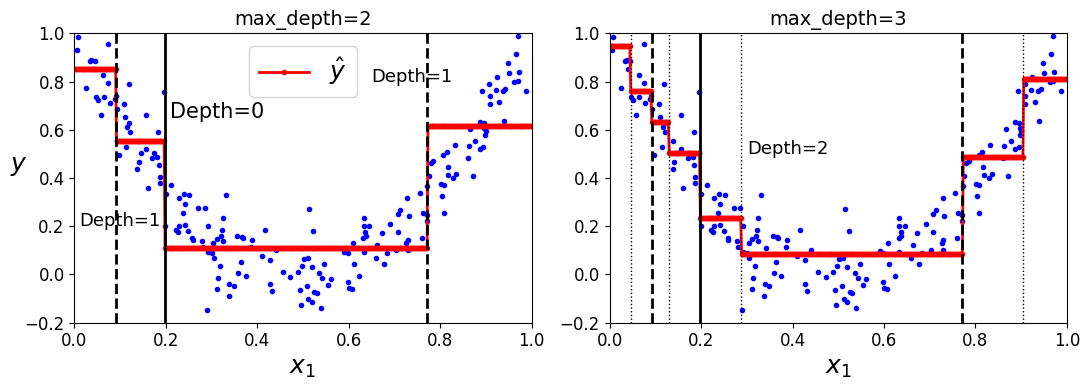

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [18]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Saving figure tree_regression_regularization_plot


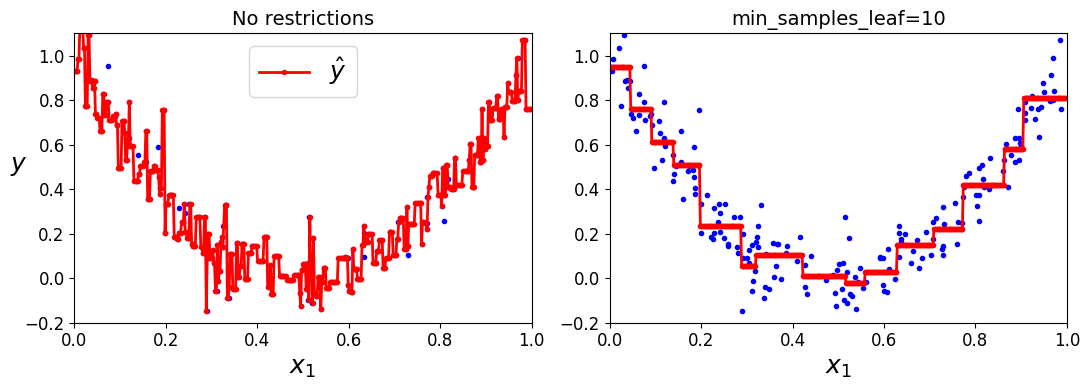

In [19]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

See appendix A.